In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#DATA WRANGLING
df = pd.read_csv("C:/Users/newge/Downloads/AusApparalSales4thQrt2020.csv")
print(df['Sales'].head())

# Check for missing values and data types
missing_data = df.isna().sum()
data_types = df.dtypes
print("Missing Data:\n", missing_data)
print("\nData Types:\n", data_types)

# Fill missing values
df['Unit'] = df['Unit'].fillna(df['Unit'].mean())
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Normalize the 'Unit' and 'Sales' columns
scaler = MinMaxScaler()
df[['Unit', 'Sales']] = scaler.fit_transform(df[['Unit', 'Sales']])
df.head()

0    20000
1    20000
2    10000
3    37500
4     7500
Name: Sales, dtype: int64
Missing Data:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Data Types:
 Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object
Number of duplicate rows: 0


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [8]:
#DATA ANALYSIS
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()

# Correct way to access the mode using stats.mode()
mode_sales_result = stats.mode(df['Sales'])

# Check if mode_sales_result.mode is a scalar or an array
if isinstance(mode_sales_result.mode, (list, np.ndarray)):  # If it’s a list or numpy array
    mode_sales = mode_sales_result.mode[0]
else:  # If it’s a scalar
    mode_sales = mode_sales_result.mode  # Directly access the scalar mode

std_sales = df['Sales'].std()

mean_unit = df['Unit'].mean()
median_unit = df['Unit'].median()

# Correct way to access the mode using stats.mode()
mode_unit_result = stats.mode(df['Unit'])

# Check if mode_unit_result.mode is a scalar or an array
if isinstance(mode_unit_result.mode, (list, np.ndarray)):  # If it’s a list or numpy array
    mode_unit = mode_unit_result.mode[0]  # Access the first mode value
else:  # If it’s a scalar
    mode_unit = mode_unit_result.mode  # Directly access the scalar mode

std_unit = df['Unit'].std()

print(f"Sales: Mean = {mean_sales}, Median = {median_sales}, Mode = {mode_sales}, Std Dev = {std_sales}")
print(f"Unit: Mean = {mean_unit}, Median = {median_unit}, Mode = {mode_unit}, Std Dev = {std_unit}")

# Sum sales by State and Group
state_sales = df.groupby('State')['Sales'].sum()
group_sales = df.groupby('Group')['Sales'].sum()

# Identify state with highest and lowest sales
highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()

# Identify group with highest and lowest sales
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

print(f"State with highest sales: {highest_sales_state}")
print(f"State with lowest sales: {lowest_sales_state}")
print(f"Group with highest sales: {highest_sales_group}")
print(f"Group with lowest sales: {lowest_sales_group}")

Sales: Mean = 0.25405433778449654, Median = 0.1904761904761905, Mode = 0.1111111111111111, Std Dev = 0.2047841710728009
Unit: Mean = 0.2540543377844965, Median = 0.19047619047619047, Mode = 0.1111111111111111, Std Dev = 0.20478417107280086
State with highest sales:  VIC
State with lowest sales:  WA
Group with highest sales:  Men
Group with lowest sales:  Seniors


Weekly Sales:
 Week
40     84.857143
41    152.777778
42    150.476190
43    151.587302
44    122.460317
45    113.809524
46    115.761905
47    115.380952
48    117.698413
49    169.412698
50    181.492063
51    182.317460
52    183.047619
53     79.571429
Name: Sales, dtype: float64

Monthly Sales:
 Month
10    645.650794
11    495.761905
12    779.238095
Name: Sales, dtype: float64

Quarterly Sales:
 Quarter
4    1920.650794
Name: Sales, dtype: float64


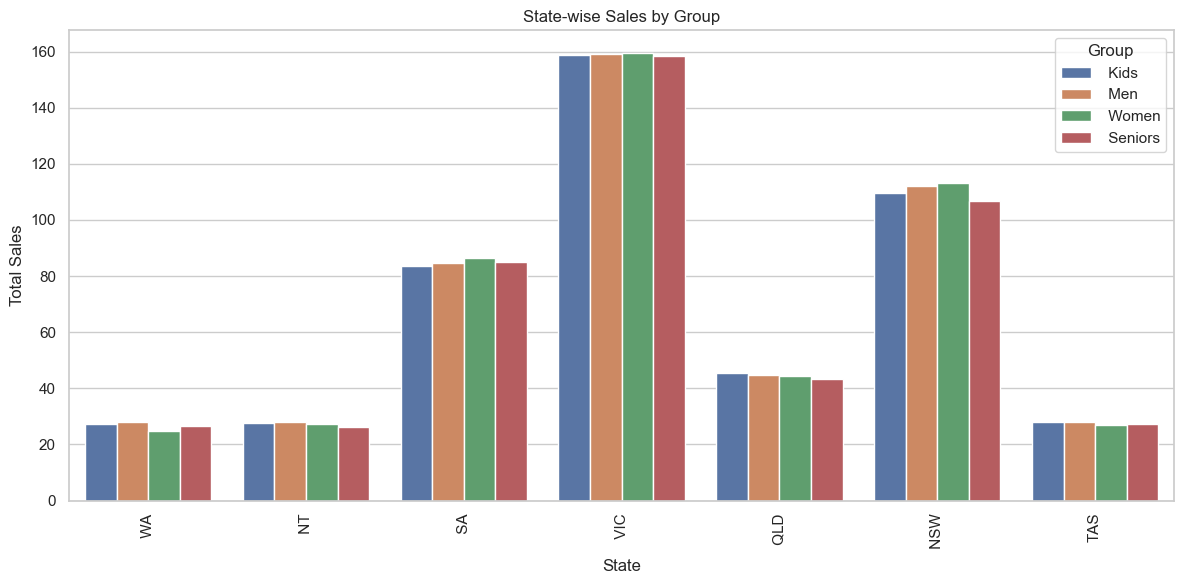

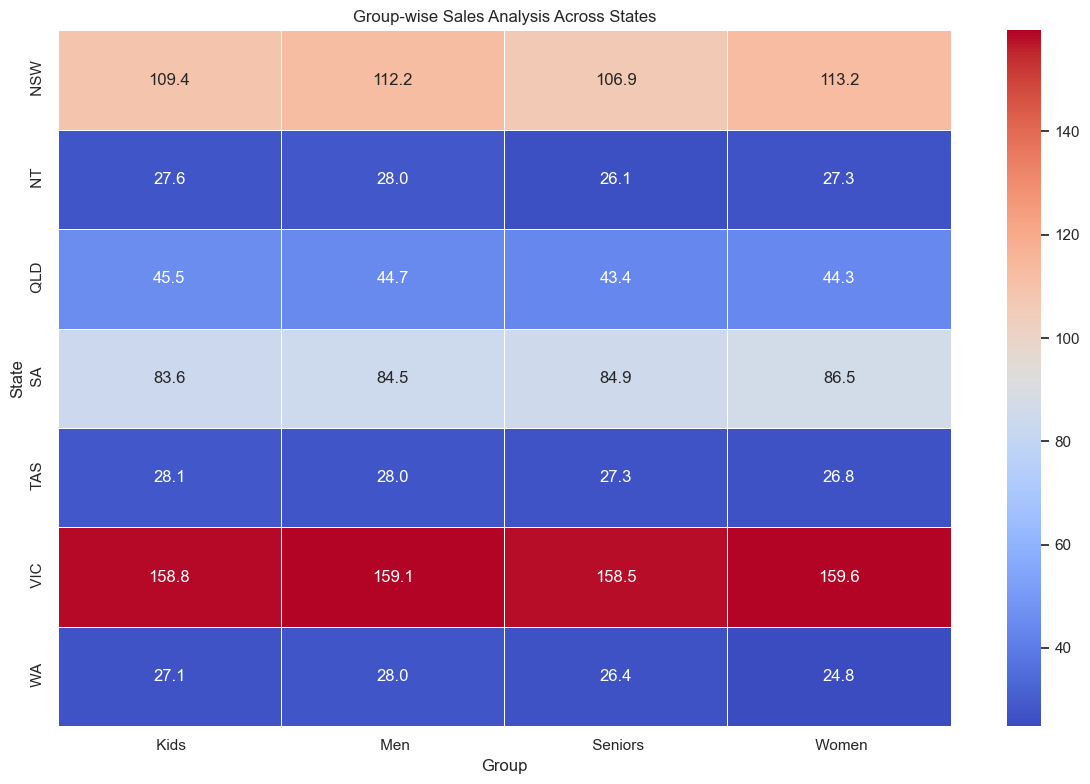

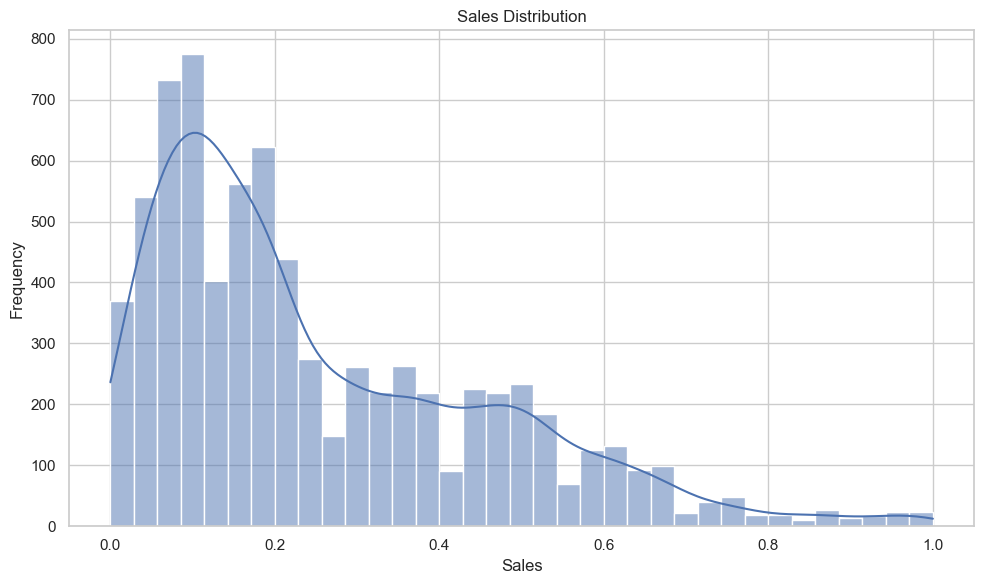

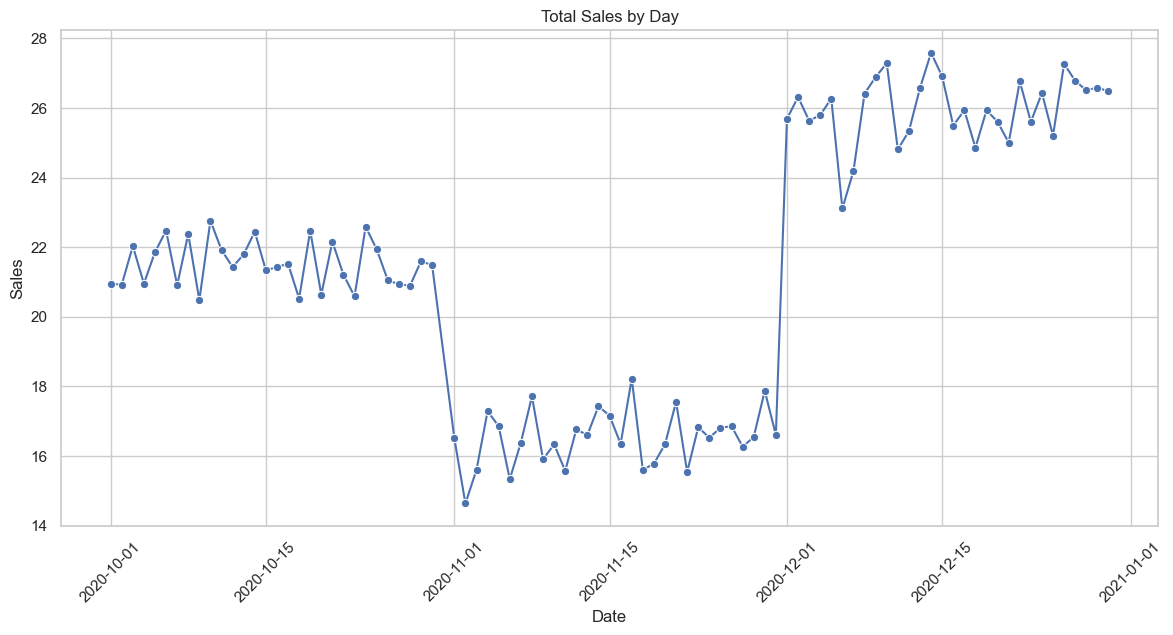

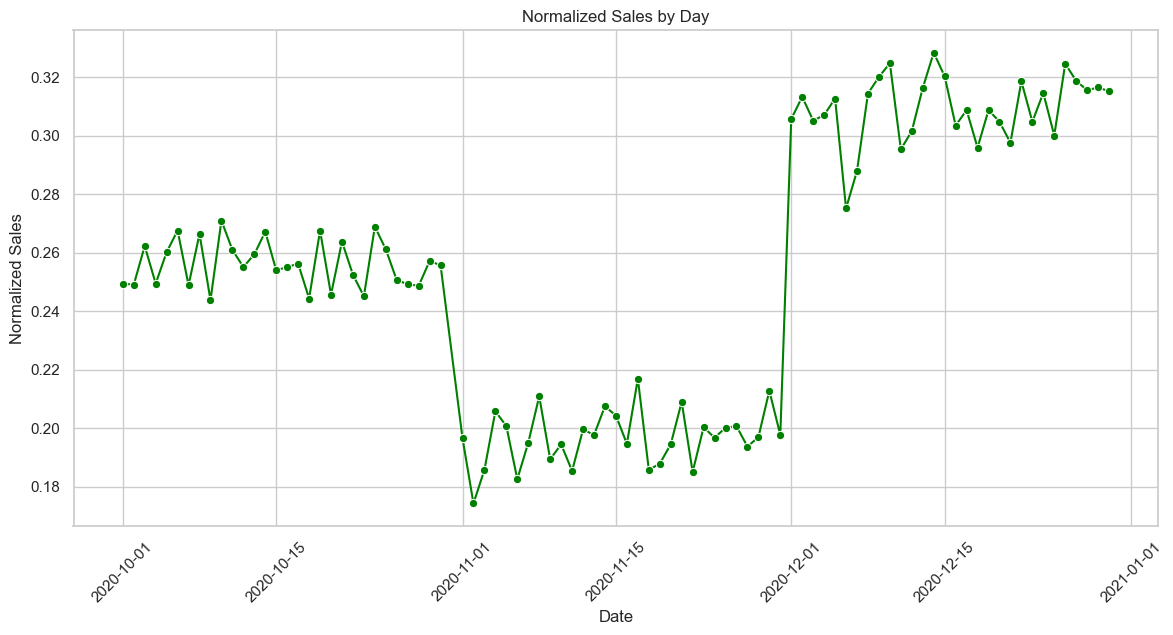

In [10]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for week, month, and quarter
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

weekly_sales = df.groupby('Week')['Sales'].sum()
monthly_sales = df.groupby('Month')['Sales'].sum()
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

print("Weekly Sales:\n", weekly_sales)
print("\nMonthly Sales:\n", monthly_sales)
print("\nQuarterly Sales:\n", quarterly_sales)

#VISUALIZATION
sns.set(style="whitegrid")

# Plot state-wise sales by group
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=90)  # Rotate state labels
plt.title('State-wise Sales by Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Pivot data for heatmap
group_state_sales = df.pivot_table(values='Sales', index='State', columns='Group', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(group_state_sales, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title('Group-wise Sales Analysis Across States')
plt.xlabel('Group')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Plot the distribution of 'Sales' to visually inspect the values
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Daily Sales and Normalized Daily Sales
df['Day'] = df['Date'].dt.date  # Extract day from 'Date'

# Sum sales by day
daily_sales = df.groupby('Day')['Sales'].sum()

# Plot daily sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o')
plt.title('Total Sales by Day')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Plot normalized daily sales
daily_normalized_sales = df.groupby('Day')['Sales'].mean()  # Use mean for normalization
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_normalized_sales.index, y=daily_normalized_sales.values, marker='o', color='green')
plt.title('Normalized Sales by Day')
plt.xlabel('Date')
plt.ylabel('Normalized Sales')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()